In [215]:
# import labrary
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
# load excel file
car = pd.read_excel('Bristol Car Data.xlsx', parse_dates=['Date'])
car.head(5)

,Postcode,Year,Quarter,Date,Car,Diff
0,BS,2021,Q3,2021-09-30,328239,-780
1,BS,2021,Q2,2021-06-30,329019,1827
2,BS,2021,Q1,2021-03-31,327192,-1699
3,BS,2020,Q4,2020-12-31,328891,-859
4,BS,2020,Q3,2020-09-30,329750,-555


In [217]:
car.dtypes

Postcode            object
Year                 int64
Quarter             object
Date        datetime64[ns]
Car                  int64
Diff                 int64
dtype: object

In [218]:
# set date as index
car.index = car['Date']
del car['Date']
car.tail(10)

,Postcode,Year,Quarter,Car,Diff
Date,,,,,
2012-06-30,BS,2012,Q2,260453,2116
2012-03-31,BS,2012,Q1,258337,2150
2011-12-31,BS,2011,Q4,256187,2254
2011-09-30,BS,2011,Q3,253933,3491
2011-06-30,BS,2011,Q2,250442,3769
2011-03-31,BS,2011,Q1,246673,4276
2010-12-31,BS,2010,Q4,242397,1005
2010-09-30,BS,2010,Q3,241392,3582
2010-06-30,BS,2010,Q2,237810,3323


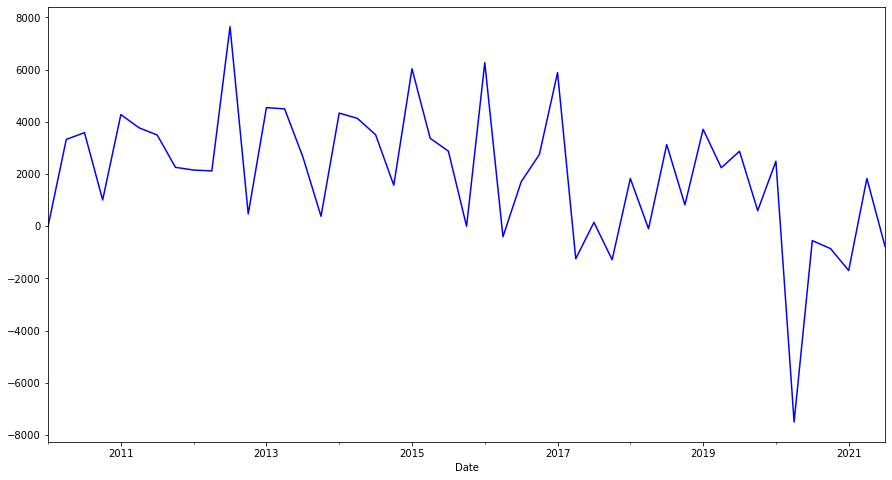

In [219]:
# plot trend
plt.figure(figsize = (15,8))
car['Diff'].plot(style='-', color='blue')

In [424]:
bs_car = car['Diff']
bs_car = pd.DataFrame(bs1_car)
bs_car.head(5)

,Diff
Date,
2021-09-30,-780
2021-06-30,1827
2021-03-31,-1699
2020-12-31,-859
2020-09-30,-555


In [425]:
len(bs1_car)*.8

37.6

In [426]:
# split train and test
train_data = bs_car[9:]
test_data = bs_car[:9]

train_data.head(5)

,Diff
Date,
2019-06-30,2237
2019-03-31,3711
2018-12-31,817
2018-09-30,3127
2018-06-30,-100


## Predicted with Holt-winter model

In [223]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [224]:
fit_model = ExponentialSmoothing(train_data['Diff'],trend='add',
                                seasonal='add',seasonal_periods=4).fit()

C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [380]:
len(test_data)

9

In [388]:
test_pred = fit_model.forecast(9)
test_pred

C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


38     -62.842141
39    1935.172246
40     733.065971
41    1895.815414
42   -1310.857495
43     687.156893
44    -514.949383
45     647.800061
46   -2558.872848
dtype: float64

In [389]:
test_pred = pd.DataFrame(test_pred)
test_pred.reset_index(drop=True, inplace=True)
#test_pred = test_pred.append(test_data_date)
test_pred

,0
0,-62.842141
1,1935.172246
2,733.065971
3,1895.815414
4,-1310.857495
5,687.156893
6,-514.949383
7,647.800061
8,-2558.872848


In [390]:
test_data_date = test_data.reset_index(drop=False)
test_pred = pd.merge(test_pred, test_data_date, left_index=True, right_index=True, how="inner")
del test_pred['Diff']
test_pred.index = test_pred['Date']
del test_pred['Date']
test_pred.rename(columns = ({'0': 'Diff'}), inplace=True)

test_pred

,0
Date,
2021-09-30,-62.842141
2021-06-30,1935.172246
2021-03-31,733.065971
2020-12-31,1895.815414
2020-09-30,-1310.857495
2020-06-30,687.156893
2020-03-31,-514.949383
2019-12-31,647.800061
2019-09-30,-2558.872848


In [391]:
test_pred.dtypes

0    float64
dtype: object

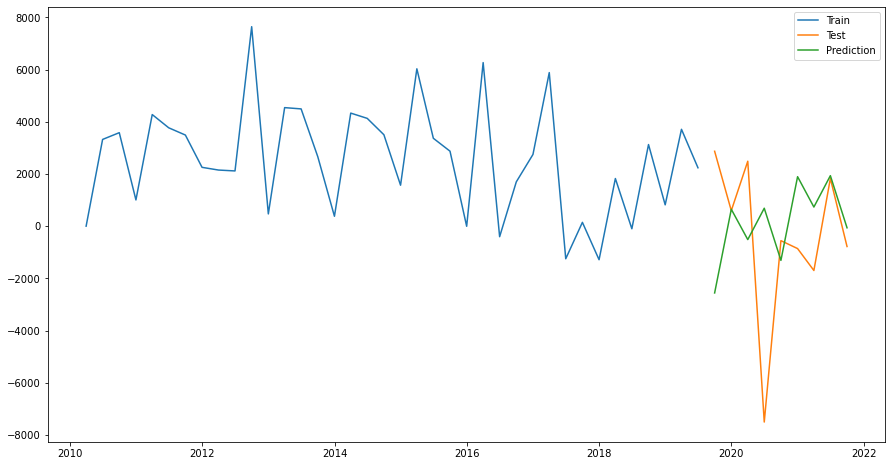

In [406]:
plt.figure(figsize = (15,8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred, label='Prediction')
plt.legend()

## Predicted with ARIMA

In [134]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [407]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [408]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [409]:
from pmdarima.arima import auto_arima
auto_arima(car['Diff'],seasonal=True, m=4,stepwise=True ).summary()

C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sari

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -420.855
Date:                Tue, 29 Mar 2022   AIC                            851.709
Time:                        23:13:06   BIC                            860.852
Sample:                             0   HQIC                           855.134
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    161.9306     59.264      2.732      0.006      45.776     278.086
ar.L1         -0.9998      0.035    -28.235      0.000      -1.069      -0.930
ma.L1         -0.0081      1.799     -0.005      0.996      -3.534       3.518
ma.L2         -0.9901      0.234     -4.227      0.000      -1.449      -0.531
sigma2      4.652e+06      0.000    3.4e+10      0.000    4.65e+06    4.65e+06
===================================================================================
Ljung-Box (Q):                       39.01   Jarque-Bera (JB):                 6.28
Prob(Q):                              0.51   Prob(JB):                         0.04
Heteroskedasticity (H):               0.63   Skew:                            -0.67
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.61e+26. Standard errors may be unstable.
"""

In [416]:
from statsmodels.tsa.arima_model import ARIMA

In [419]:
model = ARIMA(train_data.Diff, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Diff   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -335.853
Method:                       css-mle   S.D. of innovations           2003.124
Date:                Tue, 29 Mar 2022   AIC                            679.706
Time:                        23:36:57   BIC                            686.150
Sample:                             1   HQIC                           681.978
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.3225     24.256      1.910      0.056      -1.218      93.863
ar.L1.D.Diff    -0.2443      0.164     -1.485      0.137      -0.567       0.078
ma.L1.D.Diff    -0.9999      0.121     -8.24

C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


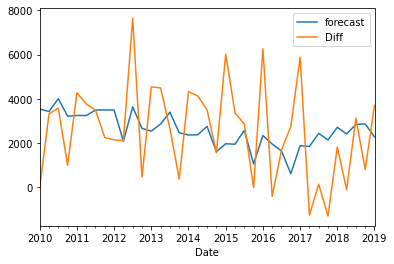

In [423]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [427]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = bs_car.Diff[9:]
test = bs_car.Diff[:9]

C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


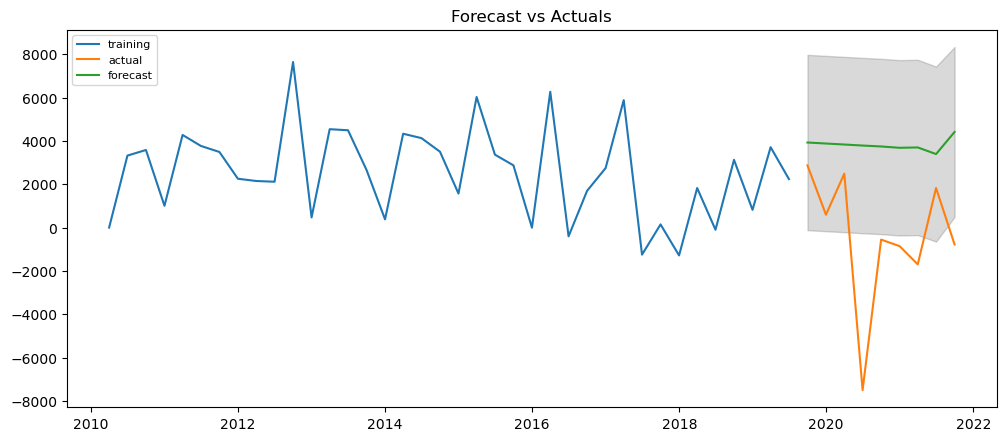

In [429]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(9, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\saras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D2.Diff   No. Observations:                   36
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -328.081
Method:                       css-mle   S.D. of innovations           1974.297
Date:                Tue, 29 Mar 2022   AIC                            668.162
Time:                        23:49:36   BIC                            677.663
Sample:                             2   HQIC                           671.478
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.7373     10.299     -0.363      0.717     -23.924      16.449
ar.L1.D2.Diff    -0.9805      0.137     -7.148      0.000      -1.249      -0.712
ar.L2.D2.Diff    -0.7579      0.171     

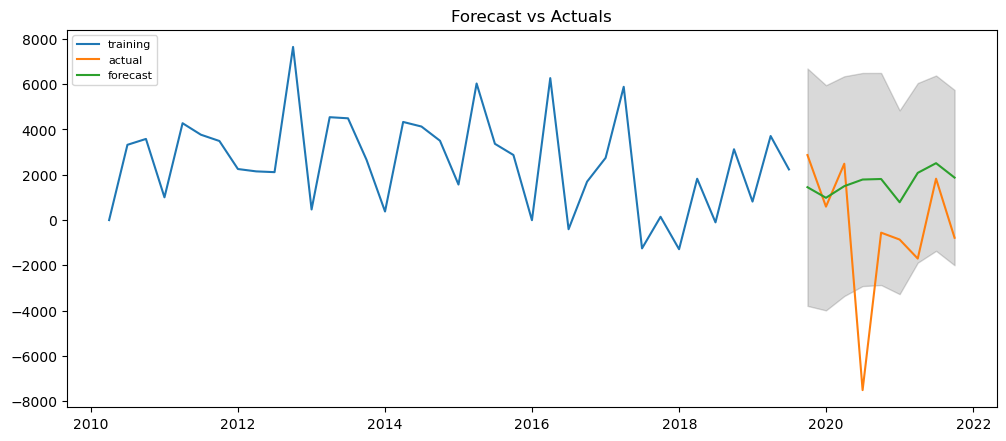

In [438]:
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(9, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()